In [1]:
import rasterio as ro
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Task 1 (20 pts): Use the rasterio package to load and visualize “la_eagleview_small.tif” and “training_data_ev.tif” respectively. You will need to visualize both images (5 pts), and show their height (5 pts), width (5 pts), and band count (5 pts). Use the variable name “land_image” to store the data from “la_eagleview_small.tif”. Use the variable name “land_label” to store the data from “training_data_ev.tif”.

In [2]:
land_image = ro.open("data/la_eagleview_small.tif")
land_label = ro.open("data/training_data_ev.tif")

In [3]:
print(land_image.count)
print(land_label.count)

3
1


In [4]:
print(land_image.width)
print(land_label.height)
print(land_image.width)
print(land_label.height)

2122
1444
2122
1444


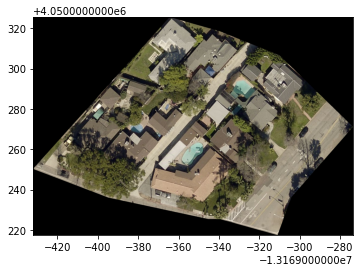

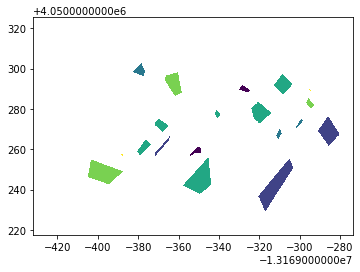

<AxesSubplot:>

In [5]:
show(land_image)
show(land_label)

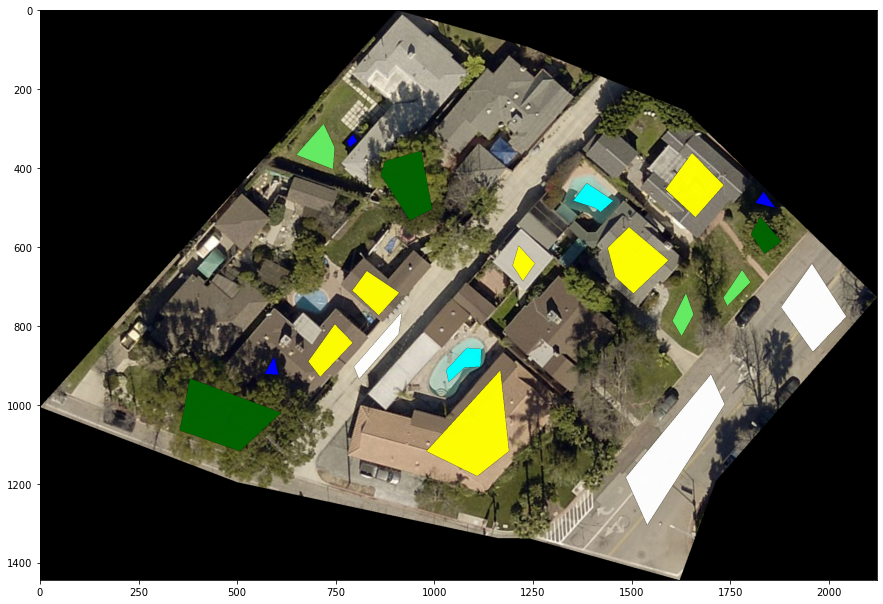

In [6]:
plt.figure(figsize = (15,15))
# show the areial image
blue = land_image.read(3, masked=True) 
green = land_image.read(2, masked=True) 
red = land_image.read(1, masked=True) 
rgb_land = np.dstack((red, green, blue)) 
plt.imshow(rgb_land)
# show the labeled training data above the image
# create a color palette to color the labels. This is because we may want to use some intuitive 
# colors to show the label (e.g., blue for pool)
palette = np.array([[0, 0, 0, 0], # no data
                    [0, 255, 255,250], # pool
                    [255, 255, 255,250], # street
                    [100,238,100,250], #grass
                    [255, 255, 0,250], #roof
                    [0,100,0,250], #tree
                    [0, 0, 255,250] #shadow
                    ])

land_label_data = land_label.read(1)
plt.imshow(palette[land_label_data])



In [7]:
# Get the labeled training data for each band
red_train = red[land_label_data>0]
blue_train = blue[land_label_data>0]
green_train = green[land_label_data>0]
X_label = np.column_stack((red_train, blue_train,green_train))

# Get the labeled value
y_label = land_label_data[land_label_data>0]
# Split to training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

##### Task 2 (30 pts): Build a random forest model, set the min_samples_leaf parameter to 10. Train the model using the training data.

In [8]:
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=42, min_samples_leaf=10) 

In [9]:
tree_class.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

##### Task 3 (30 pts): Make predictions using your trained model on the test data, and evaluate the result using two metrics accuracy and confusion matrix. You can use the following code to import these two metric functions:

In [10]:
y_pred = tree_class.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

[[ 1520     0     0     5     0     0]
 [    0 11075     0   338     9     0]
 [    0     0  1902     2   390     0]
 [    7   287     2 13773    58     8]
 [    0    12   626    63  8216     9]
 [    0     0     0     3     4   445]]


Text(0.5, 1.0, 'Accuracy Score: 0.9529596944831501')

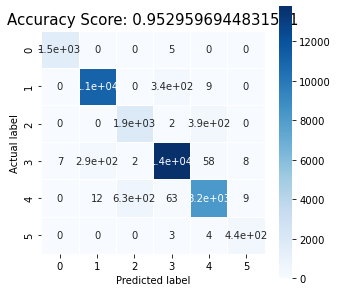

In [12]:
# confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(tree_class.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [13]:
# Accuracy score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.9530


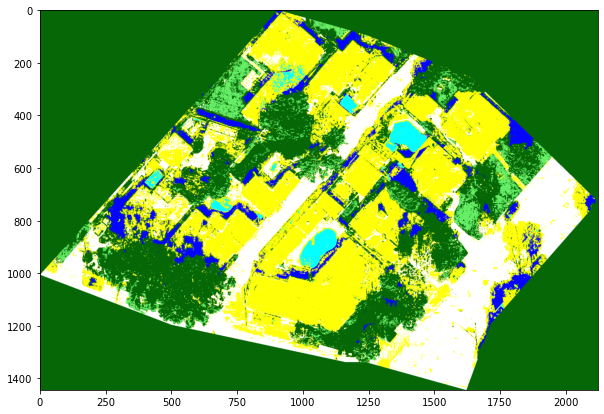

In [14]:
# prepare all the pixels of this image
X_whole = np.column_stack((red.ravel(), blue.ravel(), green.ravel()))
y_whole_pred = tree_class.predict(X_whole)
# Reshape the prediction result into the shape of the image
y_whole_pred_reshape = y_whole_pred.reshape(land_image.height, land_image.width)
# show classification 
plt.figure(figsize=(10,10)) 
plt.imshow(palette[y_whole_pred_reshape.astype(int)])